# import File

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("00_framingham.csv")
df.sample()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4142,1,47,2.0,1,20.0,0.0,0,1,0,234.0,162.0,110.0,27.51,80.0,85.0,0


In [131]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

X = df.copy()

# Initialize the IterativeImputer
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)

# Fit and transform the data
X_imputed = imputer.fit_transform(X)

X_imputed = pd.DataFrame(X_imputed, columns = X.columns)
print("Imputed Data:")
X_imputed.head()

Imputed Data:


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,TenYearCHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,27.0,80.0,77.0,0.0,0.0,0.0,1.0,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,29.0,95.0,76.0,0.0,1.0,0.0,0.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.0,75.0,70.0,1.0,0.0,0.0,0.0,0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,29.0,65.0,103.0,0.0,0.0,1.0,0.0,1.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.0,85.0,85.0,0.0,0.0,1.0,0.0,0.0


In [69]:
df.shape

(4240, 16)

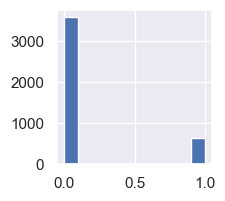

In [70]:
# Histogram of Target: 
plt.figure()
sns.set_theme()
df['TenYearCHD'].hist(figsize=(2,2))
plt.show()

<Figure size 640x480 with 0 Axes>

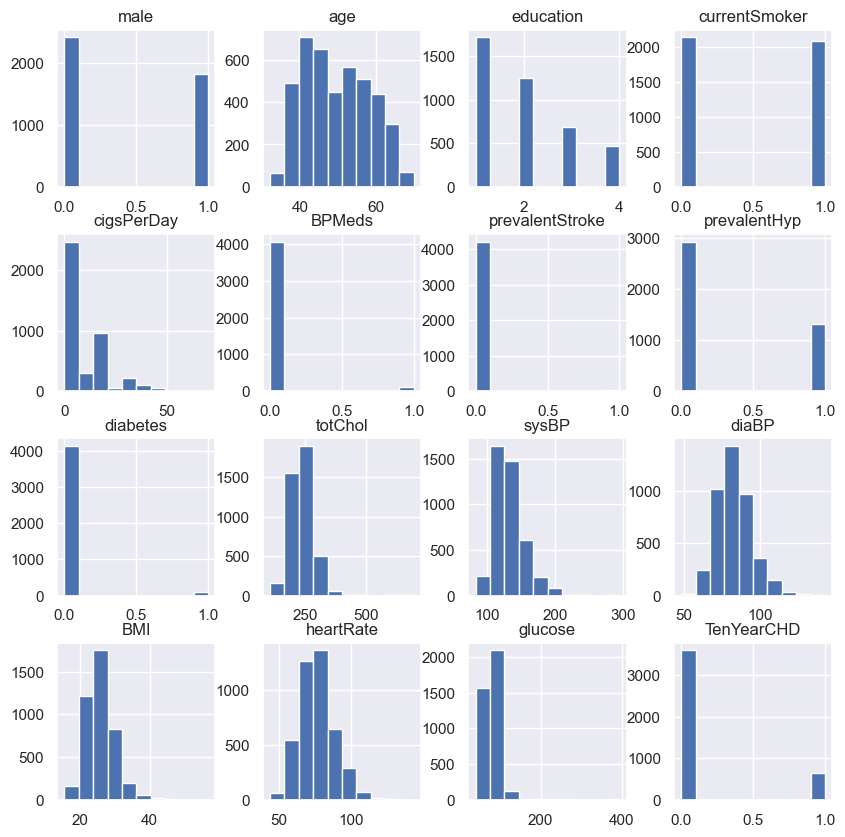

In [71]:
# Histogram of all Data: 
plt.figure()
sns.set_theme()
df.hist(figsize=(10,10))
plt.show()

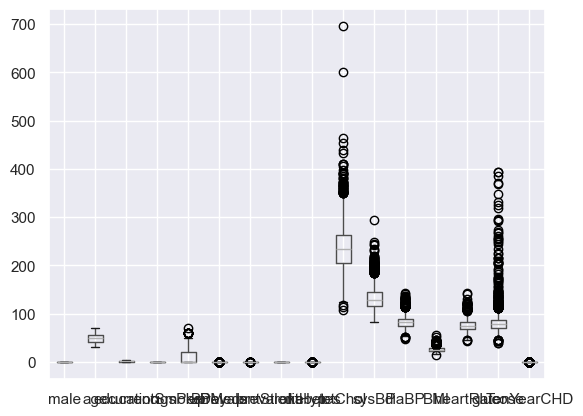

In [72]:
# Histogram of all Data: 
plt.figure()
sns.set_theme()
df.boxplot(figsize=(10,10))
plt.show()

In [73]:
print('missing values: ')
df.isna().sum()

missing values: 


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [74]:
np.round(df.isna().sum()/df.shape[0]*100)

male               0.0
age                0.0
education          2.0
currentSmoker      0.0
cigsPerDay         1.0
BPMeds             1.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            1.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            9.0
TenYearCHD         0.0
dtype: float64

In [75]:
# get min max from the continual values:
describeschon = df.describe()
describeschon.loc[['min', 'max'],['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
min,32.0,0.0,107.0,83.5,48.0,15.54,44.0,40.0
max,70.0,70.0,696.0,295.0,142.5,56.80,143.0,394.0


# Gender
Value missing?  NO \
outliner? NO

In [76]:
df["male"].value_counts()

male
0    2420
1    1820
Name: count, dtype: int64

# Age

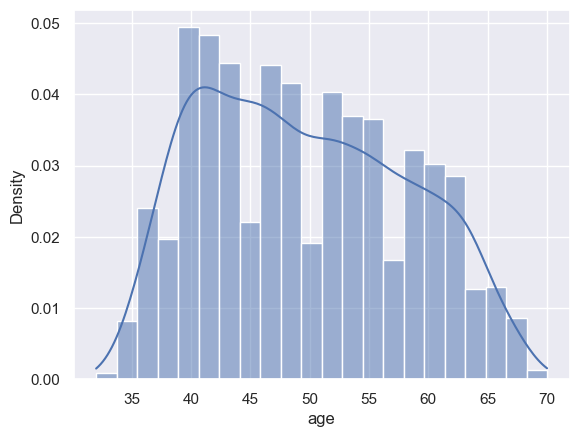

In [77]:
plt.figure()
sns.histplot(df["age"], kde=True, stat="density")
plt.show()

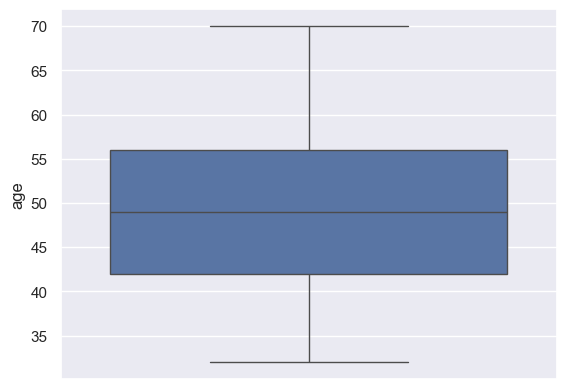

In [78]:
sns.boxplot(df["age"])
plt.show()

# Education

In [79]:
print(df["education"].value_counts())
print()
print('missing Values: ', df["education"].isna().sum())
education_missing_vals = df[df["education"].isna()]

education
1.0    1720
2.0    1253
3.0     689
4.0     473
Name: count, dtype: int64

missing Values:  105


In [80]:
# get dummie variables for
df = pd.get_dummies(df, columns=["education"], dtype=int)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0


In [81]:
df.iloc[education_missing_vals.index].sample(20)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
2901,0,55,0,0.0,0.0,0,0,0,270.0,117.0,71.0,23.79,71.0,72.0,0,0,0,0,0
3113,1,42,1,5.0,0.0,0,1,0,184.0,149.0,95.0,28.77,80.0,94.0,0,0,0,0,0
1681,0,55,0,0.0,0.0,0,0,0,265.0,123.0,78.0,24.59,55.0,NaN,0,0,0,0,0
719,0,38,1,5.0,0.0,0,0,0,190.0,121.0,79.0,25.59,90.0,84.0,0,0,0,0,0
3618,1,50,1,2.0,0.0,0,0,0,238.0,121.0,85.0,25.31,88.0,NaN,0,0,0,0,0
1227,1,57,0,0.0,0.0,0,1,0,210.0,158.0,104.0,30.93,73.0,113.0,0,0,0,0,0
2518,0,63,0,0.0,0.0,0,1,0,246.0,151.0,88.0,25.94,69.0,73.0,0,0,0,0,0
3655,1,56,1,30.0,0.0,0,1,0,193.0,139.0,93.0,28.67,57.0,67.0,1,0,0,0,0
1984,1,63,0,0.0,0.0,0,1,0,240.0,136.0,94.0,29.17,64.0,57.0,0,0,0,0,0
4098,1,37,1,20.0,0.0,0,0,0,184.0,113.0,81.0,22.16,85.0,63.0,0,0,0,0,0


In [82]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887,0.405660,0.295519,0.162500,0.111557
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953,0.491077,0.456329,0.368952,0.314857
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Smoking

In [83]:
print(df["currentSmoker"].value_counts())
print()
percentage_smokers = (df["currentSmoker"].value_counts()[1] /
                     (df["currentSmoker"].value_counts()[0] + df["currentSmoker"].value_counts()[1])) * 100

print('percentage of smokers: ', percentage_smokers)

print()
print('missing Values currentSmoker: ', df["currentSmoker"].isna().sum())
print('missing Values cigsPerDay: ', df["cigsPerDay"].isna().sum())

print()
print('Count for missing for cigsPerDay value and smoking: ',df[(df["cigsPerDay"].isna()) & (df["currentSmoker"] == 1)].shape[0])


currentSmoker
0    2145
1    2095
Name: count, dtype: int64

percentage of smokers:  49.410377358490564

missing Values currentSmoker:  0
missing Values cigsPerDay:  29

Count for missing for cigsPerDay value and smoking:  29


In [84]:
# print people that did not fill in the cigs per day: 
df[df["cigsPerDay"].isna()].head(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
131,1,43,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0,0,0,0,1
139,1,49,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1,0,0,0,1
1046,0,49,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0,1,0,0,0
1292,1,42,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0,0,0,1,0
1347,0,58,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0,0,0,0,1


In [85]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Impute the cigsPerDay values for the 29 missing instances
imputer = IterativeImputer()

df["cigsPerDay"] = imputer.fit_transform(df[["cigsPerDay"]]).round()


In [86]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
education_1.0        0
education_2.0        0
education_3.0        0
education_4.0        0
dtype: int64

# Blood Pressure Medication
Use of Anti-hypertensive medication at exam

In [87]:
print(df["BPMeds"].value_counts())
print()
percentage_bpmeds = (df["BPMeds"].value_counts()[1] /
                     (df["BPMeds"].value_counts()[0] + df["BPMeds"].value_counts()[1])) * 100

print("percentage:", percentage_bpmeds)

BPMeds
0.0    4063
1.0     124
Name: count, dtype: int64

percentage: 2.9615476474802964


In [88]:
# Isolate na values
print('Null values in BPMeds: ',df[df["BPMeds"].isna()].shape[0])

Null values in BPMeds:  53


In [89]:
df[df["BPMeds"].isna()].head(53)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
49,1,36,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.0,0,0,0,1,0
77,0,44,1,20.0,NaN,0,0,0,213.0,115.0,72.5,21.16,80.0,89.0,0,0,0,1,0
193,1,45,1,40.0,NaN,0,0,0,278.0,135.0,84.0,23.79,75.0,79.0,1,0,0,1,0
245,1,46,1,30.0,NaN,0,1,0,253.0,147.0,85.0,30.62,100.0,75.0,0,1,0,0,0
314,0,39,0,0.0,NaN,0,0,0,242.0,113.0,85.0,25.54,85.0,104.0,0,0,1,0,0
395,0,65,0,0.0,NaN,0,1,0,270.0,165.0,98.0,21.66,62.0,92.0,1,0,1,0,0
421,1,44,0,0.0,NaN,0,0,1,190.0,122.0,81.0,36.12,70.0,143.0,0,1,0,0,0
765,1,50,1,9.0,NaN,0,0,0,296.0,119.0,90.0,23.55,75.0,69.0,1,0,0,0,1
769,0,37,0,0.0,NaN,0,0,0,145.0,105.0,73.0,23.44,58.0,80.0,0,0,0,1,0
797,0,59,0,0.0,NaN,0,1,0,240.0,195.0,118.0,23.82,80.0,73.0,0,0,0,0,1


In [90]:
# Impute the missing values
df["BPMeds"] = imputer.fit_transform(df[["BPMeds"]]).round()

In [91]:
df["BPMeds"].isna().sum()

0

In [92]:
df["BPMeds"].value_counts()

BPMeds
0.0    4116
1.0     124
Name: count, dtype: int64

# totChol: Total cholesterol (mg/dL)

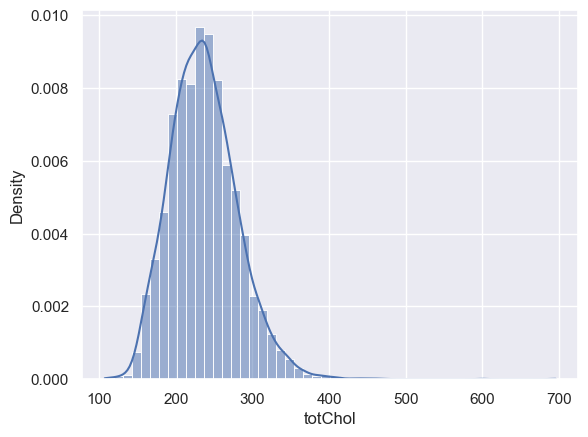

In [93]:
plt.figure()
sns.histplot(df["totChol"], kde=True, stat="density", bins = 50)
plt.show()

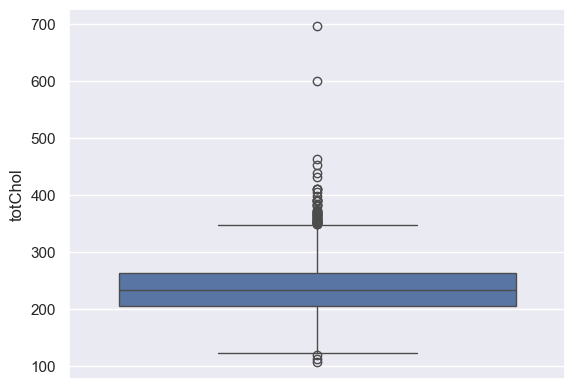

In [94]:
sns.boxplot(df["totChol"])
plt.show()

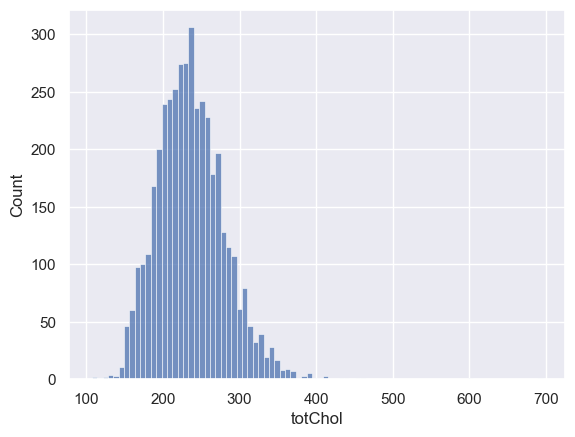

In [95]:
sns.histplot(df["totChol"])
plt.show()

In [96]:
# two patients with "abnormal high chol values"
high_chol = df[df["totChol"]> 500]
high_chol.head(high_chol.shape[0])

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1,0,1,0,0
3160,1,51,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0,0,0,0,0


In [97]:
# isolate na values
df_missing_totchol = df[df["totChol"].isna()]
print('missing Values for Cholesterin: ', df_missing_totchol.shape[0])
df_missing_totchol.head()

missing Values for Cholesterin:  50


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
42,0,52,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1,1,0,0,0
154,0,38,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0,0,0,1,0
247,0,40,1,20.0,0.0,0,0,1,NaN,114.0,65.0,21.19,61.0,NaN,1,0,1,0,0
429,1,65,0,0.0,0.0,0,0,0,NaN,152.5,97.5,28.35,65.0,73.0,0,0,0,0,0
567,0,66,1,15.0,0.0,0,1,0,NaN,188.0,108.5,20.49,90.0,NaN,0,0,1,0,0


In [98]:
# Impute the missing values
df["totChol"] = imputer.fit_transform(df[["totChol"]]).round()

In [99]:
df["totChol"].isna().sum()

0

# BMI: Body Mass Index, weight (kg)/height (m)^2

In [100]:
df["BMI"].isna().sum()

19

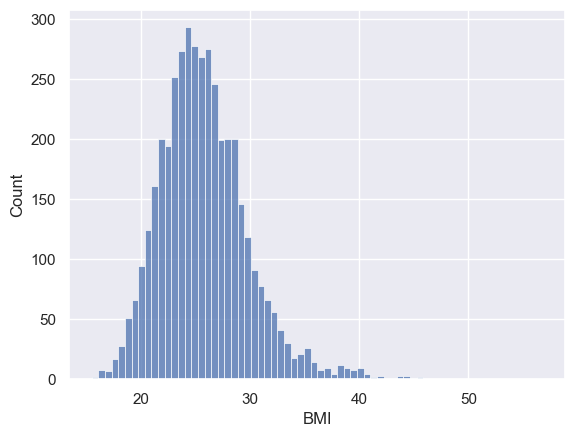

In [101]:
sns.histplot(df["BMI"])
plt.show()

In [102]:
df_missing_bmi = df[df["BMI"].isna()]

df_missing_bmi.head(19)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
97,0,40,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1,0,1,0,0
294,0,47,1,25.0,0.0,0,1,1,258.0,195.0,90.0,NaN,86.0,NaN,1,1,0,0,0
705,0,45,0,0.0,0.0,0,0,0,231.0,107.5,57.5,NaN,81.0,NaN,0,0,0,1,0
1155,0,64,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,0,1,0,0
1161,0,47,0,0.0,0.0,0,0,0,195.0,126.0,75.0,NaN,60.0,NaN,1,0,1,0,0
1594,0,40,0,0.0,0.0,0,0,0,164.0,135.0,75.0,NaN,75.0,85.0,0,0,1,0,0
1604,1,40,1,20.0,0.0,0,0,0,266.0,101.0,73.0,NaN,70.0,64.0,0,0,0,0,0
1624,0,70,0,0.0,0.0,1,1,0,107.0,143.0,93.0,NaN,68.0,62.0,1,1,0,0,0
1747,0,51,0,0.0,0.0,0,0,0,237.0,130.0,89.5,NaN,80.0,NaN,0,1,0,0,0
1975,1,63,1,20.0,0.0,1,1,0,213.0,163.0,94.0,NaN,76.0,69.0,1,1,0,0,0


In [103]:
# Impute the missing values
df["BMI"] = imputer.fit_transform(df[["BMI"]]).round()

In [104]:
df["BMI"].isna().sum()

0

# heartRate: Heart rate (beats/minute)

In [105]:
df["heartRate"].isna().sum()

1

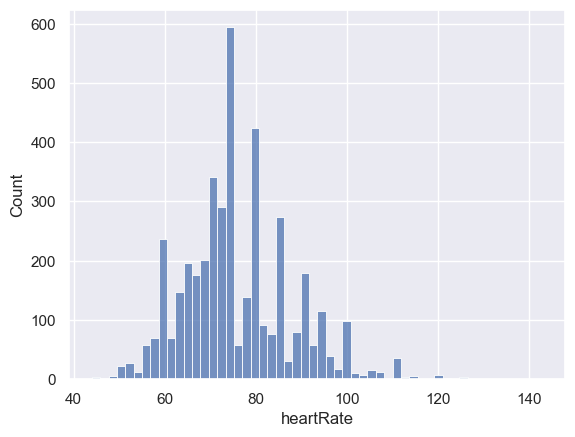

In [106]:
sns.histplot(df["heartRate"])
plt.show()

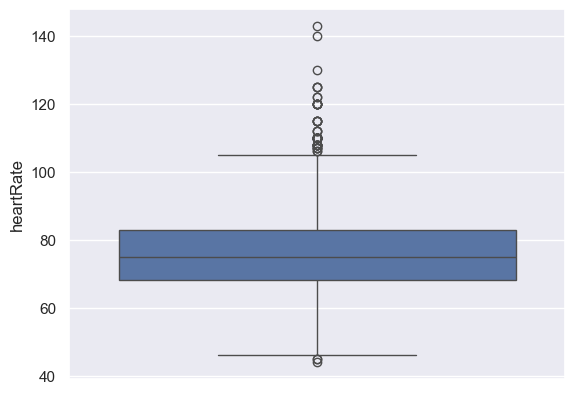

In [107]:
sns.boxplot(df["heartRate"])
plt.show()

In [108]:
df_missing_heartrate = df[df["heartRate"].isna()]
df_missing_heartrate.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
689,1,64,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.0,NaN,91.0,1,1,0,0,0


In [109]:
# Impute the missing values
imputer = IterativeImputer(random_state=42)

df["heartRate"] = imputer.fit_transform(df[["heartRate"]]).round()

In [110]:
print(df.iloc[689])

male                 1.0
age                 64.0
currentSmoker        1.0
cigsPerDay          18.0
BPMeds               0.0
prevalentStroke      0.0
prevalentHyp         1.0
diabetes             0.0
totChol            219.0
sysBP              172.5
diaBP               75.0
BMI                 29.0
heartRate           76.0
glucose             91.0
TenYearCHD           1.0
education_1.0        1.0
education_2.0        0.0
education_3.0        0.0
education_4.0        0.0
Name: 689, dtype: float64


# glucose: Blood glucose level (mg/dL)

In [111]:
df["glucose"].isna().sum()

388

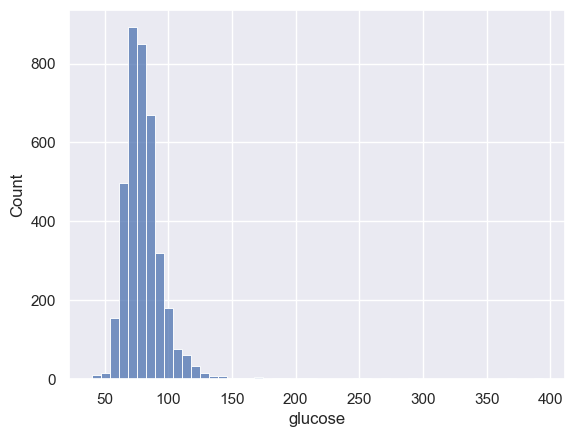

In [112]:
sns.histplot(df["glucose"], bins = 50)
plt.show()

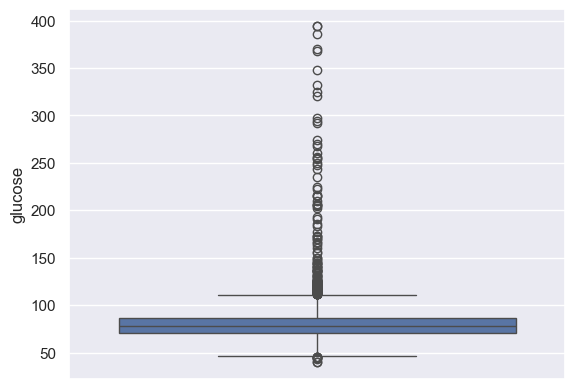

In [113]:
sns.boxplot(df["glucose"])
plt.show()

In [114]:
df["glucose"].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [115]:
df_missing_glucose = df[df["glucose"].isna()]
df_missing_glucose.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
14,0,39,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.0,85.0,NaN,0,0,1,0,0
21,0,43,0,0.0,0.0,0,0,0,185.0,123.5,77.5,30.0,70.0,NaN,0,1,0,0,0
26,0,60,0,0.0,0.0,0,0,0,260.0,110.0,72.5,27.0,65.0,NaN,0,1,0,0,0
42,0,52,0,0.0,1.0,0,1,0,237.0,148.0,92.0,25.0,70.0,NaN,1,1,0,0,0
54,0,39,1,20.0,0.0,0,0,0,209.0,115.0,75.0,23.0,90.0,NaN,0,0,1,0,0


In [116]:
# Impute the missing values
df["glucose"] = imputer.fit_transform(df[["glucose"]]).round()

In [117]:
df["glucose"].isna().sum()

0

In [118]:
df.iloc[df_missing_glucose.index].head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
14,0,39,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.0,85.0,82.0,0,0,1,0,0
21,0,43,0,0.0,0.0,0,0,0,185.0,123.5,77.5,30.0,70.0,82.0,0,1,0,0,0
26,0,60,0,0.0,0.0,0,0,0,260.0,110.0,72.5,27.0,65.0,82.0,0,1,0,0,0
42,0,52,0,0.0,1.0,0,1,0,237.0,148.0,92.0,25.0,70.0,82.0,1,1,0,0,0
54,0,39,1,20.0,0.0,0,0,0,209.0,115.0,75.0,23.0,90.0,82.0,0,0,1,0,0


# Target

In [119]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [120]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005896,0.029245,0.005896,0.310613,0.025708,236.703066,132.354599,82.897759,25.802830,75.879009,81.966981,0.151887,0.405660,0.295519,0.162500,0.111557
std,0.495027,8.572942,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327533,22.033300,11.910394,4.084308,12.023930,22.831751,0.358953,0.491077,0.456329,0.368952,0.314857
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,16.000000,44.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.000000,68.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.000000,75.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.000000,83.000000,85.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,57.000000,143.000000,394.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
education_1.0      0
education_2.0      0
education_3.0      0
education_4.0      0
dtype: int64

In [122]:
# check if every number is natural
for col in df.columns:
    print((df[col]%1).value_counts().shape)

(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(2,)
(2,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)


In [123]:
# rearrange columns
df = df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0', 'TenYearCHD']]


# Save new File

In [124]:
# safe new dataframe in a csv
df.to_csv("01_framingham_clean.csv", index= False)

In [ ]:
df.head()

(4240, 19)

In [132]:
# diff = (X_imputed != df)
print("Differences between DataFrames:")
# print(diff.sum())
print((X_imputed - df).abs().mean())

Differences between DataFrames:
male               0.0
age                0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
education_1.0      0.0
education_2.0      0.0
education_3.0      0.0
education_4.0      0.0
TenYearCHD         0.0
dtype: float64
